# PROGRAMMING FOR FINANCE - FINAL EXAM

## Dataset - Bank Customer Churn Prediction

### Submitted by
- Maaz Siddiqui 22302
- Mahrusa Akram 22266
- Mehmood Ahmed 22272

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
#from prettytable import PrettyTable


In [2]:
dataframe = pd.read_csv('Bank Customer Churn Prediction.csv', sep = ',')

In [3]:
dataframe.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataframe.tail()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
dataframe.shape


(10000, 12)

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [7]:
dataframe.describe()


,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
print("Shape of Data: ",dataframe.shape, "\n")

print("Data Description")
dataframe.info()

Shape of Data:  (10000, 12) 

Data Description
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [9]:
dataframe.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [10]:
dataframe.duplicated().sum()

0

In [11]:
# Decode Churn variable 
task_decoder = {"Yes":1, "No":0}

def decode_task(f):
    f["churn"] = f["churn"].astype(str)
    ser = f["churn"]
    for key in task_decoder:
        ser.replace(key, task_decoder[key], inplace=True)
decode_task(dataframe)

dataframe['churn'] = pd.to_numeric(dataframe['churn'], errors='coerce')
dataframe.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
numerical_columns = dataframe.select_dtypes(include='number').columns.tolist()
categorical_columns = dataframe.select_dtypes(exclude='number').columns.tolist()
numerical_columns.remove('churn')
print("Numerical Features:", numerical_columns , "\n")
print("Categorical Features", categorical_columns)

Numerical Features: ['customer_id', 'credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary'] 

Categorical Features ['country', 'gender']


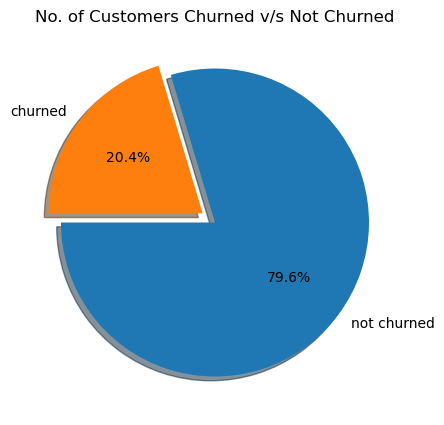

In [13]:
class_counts = dataframe['churn'].value_counts()
fig = plt.figure(figsize=(5,5)) 
plt.pie(class_counts, labels=['not churned','churned'],explode=(0,0.1),shadow=True, autopct="%1.1f%%", startangle=180)
plt.title('No. of Customers Churned v/s Not Churned')
plt.show()

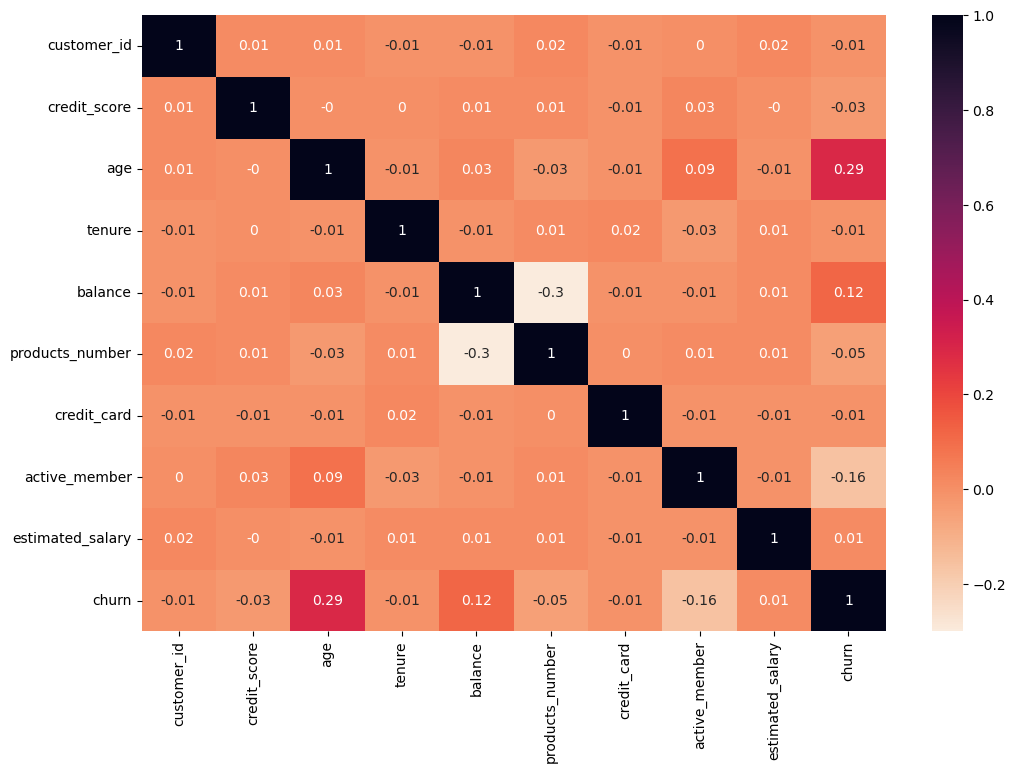

In [14]:
c_map=sns.color_palette("rocket_r", as_cmap=True)
correlation = dataframe.corr(numeric_only=True).round(2)
plt.figure(figsize = (12,8))
sns.heatmap(correlation, annot = True, cmap = c_map)
plt.show()

In [15]:
abs(correlation['churn']).sort_values(ascending=False)

churn               1.00
age                 0.29
active_member       0.16
balance             0.12
products_number     0.05
credit_score        0.03
customer_id         0.01
tenure              0.01
credit_card         0.01
estimated_salary    0.01
Name: churn, dtype: float64

In [16]:
legend_labels = {1: 'Yes', 0: 'No'}

9


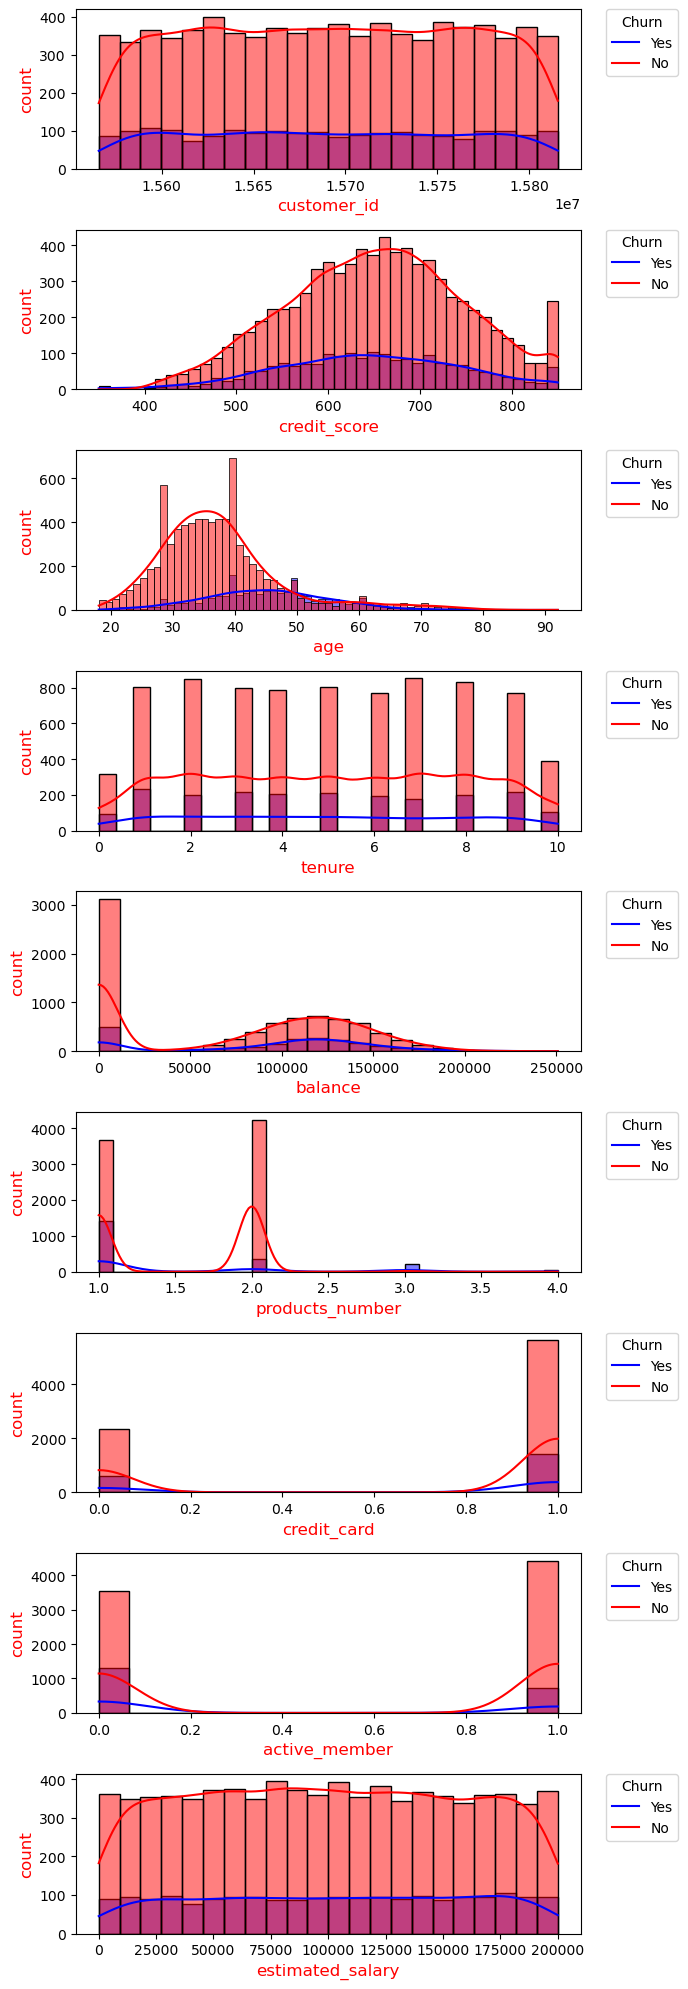

In [17]:
colors = ["red", "green", "blue", "orange"]

num_cols = len(numerical_columns)
print(num_cols)
plt.figure(figsize=(7, 20))

for i, col in enumerate(numerical_columns, start=1):
    plt.subplot(num_cols, 1, i)
    sns.histplot(data=dataframe, x=col, hue='churn', kde=True, palette=[colors[0], colors[2]])
    plt.legend(title='Churn', labels=[legend_labels[x] for x in dataframe['churn'].unique()], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
    plt.xlabel(col, fontsize=12, color=colors[0])
    plt.ylabel('count', fontsize=12, color=colors[0])

plt.tight_layout()
plt.show()

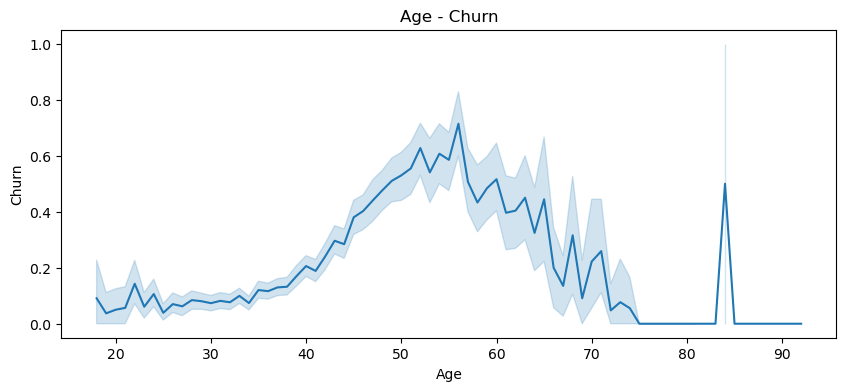

In [18]:
plt.figure(figsize = (10, 4))
sns.lineplot(x = "age", y = "churn", data = dataframe)
plt.title("Age - Churn")
plt.xlabel("Age")
plt.ylabel("Churn")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_14648\903985445.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='tenure', y='count', data=churned, ci=None)


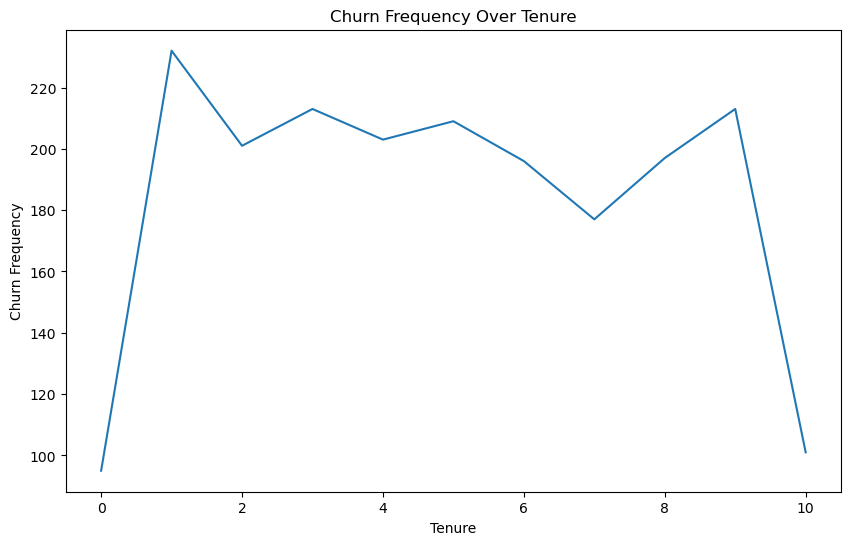

In [19]:
tenure_churn_count = dataframe.groupby(['tenure', 'churn']).size().reset_index(name='count')

# Filter churn occurrences to plot only churned instances
churned = tenure_churn_count[tenure_churn_count['churn'] == 1]

# Plotting the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='tenure', y='count', data=churned, ci=None)
plt.xlabel('Tenure')
plt.ylabel('Churn Frequency')
plt.title('Churn Frequency Over Tenure')
plt.show()

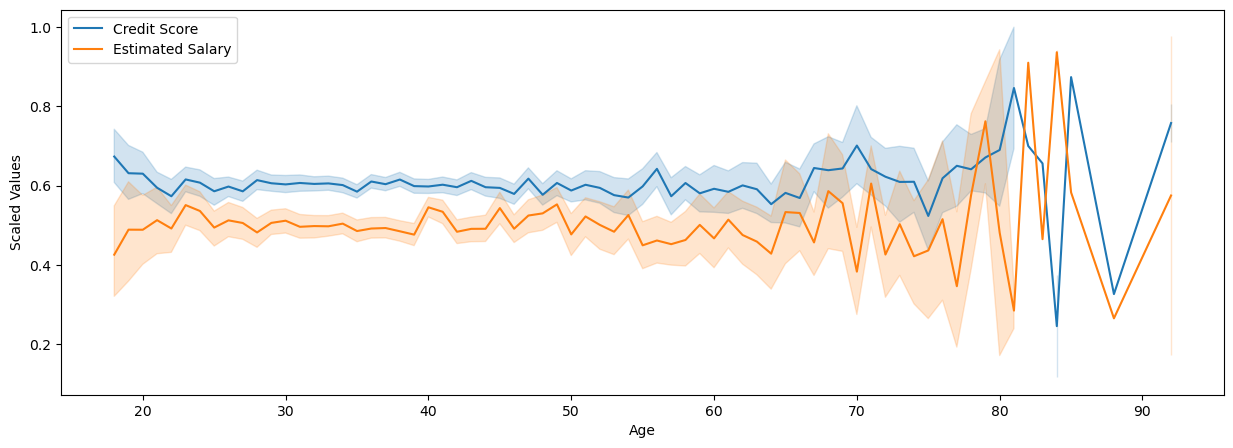

In [20]:
from sklearn.preprocessing import MinMaxScaler
credit_score_scale = MinMaxScaler().fit_transform(dataframe[["credit_score"]])
estimated_salary_scale = MinMaxScaler().fit_transform(dataframe[["estimated_salary"]])

plt.figure(figsize=(15, 5))
sns.lineplot(x=dataframe["age"], y=credit_score_scale.flatten(), label='Credit Score')
sns.lineplot(x=dataframe["age"], y=estimated_salary_scale.flatten(), label='Estimated Salary')
plt.xlabel("Age")
plt.ylabel("Scaled Values")
plt.legend()
plt.show()

Credit Score

Most people have a credit score between 600 and 700.
Age

Most non-churners are 30-40 years old, while most churners are 40-60 years old.
Tenure

Most churners have a tenure of 1 year.
Only a few customers have a tenure of 0 or 10 years.
From 2 to 7 years Churn count is gradually decrease
After 7 year to 9 years a hype of churn created due to which count of customer decrease so after 9 years churn frequency is down rapidly.
Balance

There are many people who have no bank balance
Product Number

Most customers have only 1 or 2 products.
Most of the non-churners have 2 products.
Most of the churners have 1 product.
Customers having 3,4 products are mostly churners.
Credit Card and Active Member

Most churners have credit cards but are not active members

In [21]:
temp_df = dataframe.groupby(["country", "gender"]).agg({"credit_score": ["max", "min", "mean"],
                                      "estimated_salary": ["max", "min", "mean"]})
temp_df.style.background_gradient(cmap = "Blues")

C:\Users\HP\AppData\Local\Temp\ipykernel_14648\3364260248.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['credit_score'])
C:\Users\HP\AppData\Local\Temp\ipykernel_14648\3364260248.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['age'])
C:\Users\HP\AppData\Local\Temp\

<Axes: xlabel='estimated_salary'>

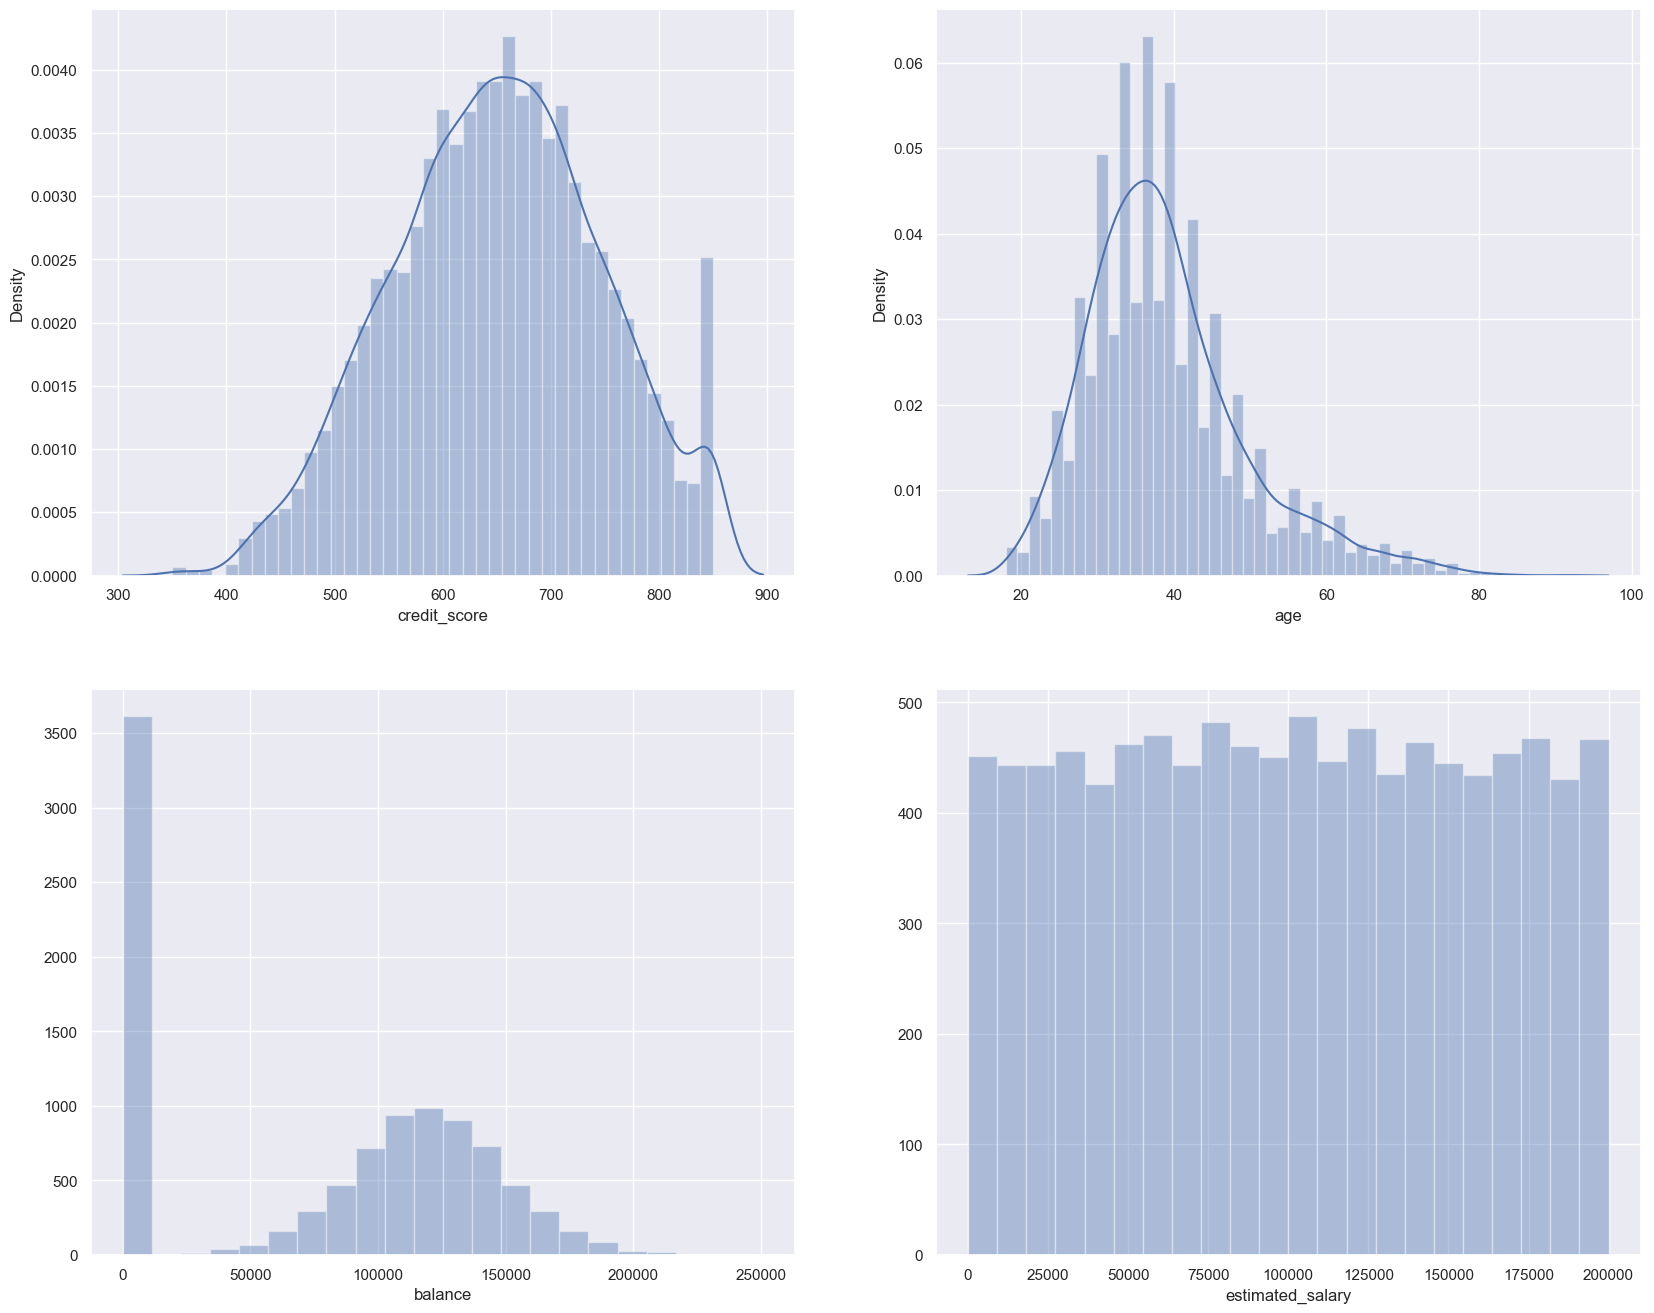

In [22]:
plt.figure(figsize = (20,25))

sns.set(color_codes = True)

plt.subplot(3,2,1)
sns.distplot(dataframe['credit_score'])

plt.subplot(3,2,2)
sns.distplot(dataframe['age'])

plt.subplot(3,2,3)
sns.distplot(dataframe['balance'], kde = False)

plt.subplot(3,2,4)
sns.distplot(dataframe['estimated_salary'], kde = False)

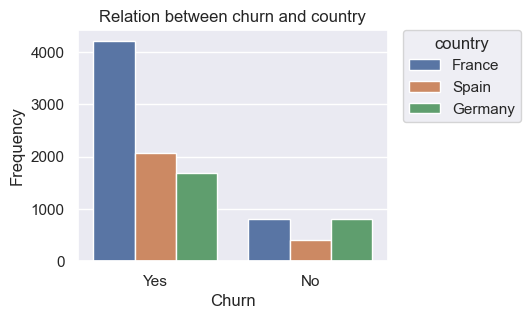

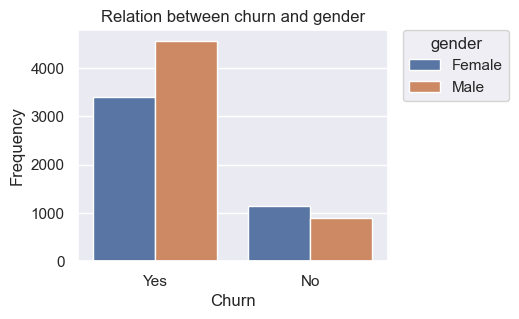

In [23]:
for col in categorical_columns:
    plt.figure(figsize=(4, 3))  # Adjust figure size if needed
    c = sns.countplot(x='churn', hue=col, data=dataframe)
    c.set_xticklabels(['Yes' if x==1 else 'No' for x in dataframe['churn'].unique()])
    plt.legend(title=col,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
    plt.title(f'Relation between churn and {col}')
    plt.xlabel("Churn")
    plt.ylabel('Frequency')
    plt.show()

- France has the highest number of churners
- Spain has relatively few churners.
- Female churners > Male churners.

## Bivariate Analysis

In our bivariate analysis we were able to get some insights, product 2 despite having a lot of samples generally does not have a churn problem, men and women are well distributed in churn values, and the other variables are also well distributed.¶


<Axes: xlabel='churn', ylabel='count'>

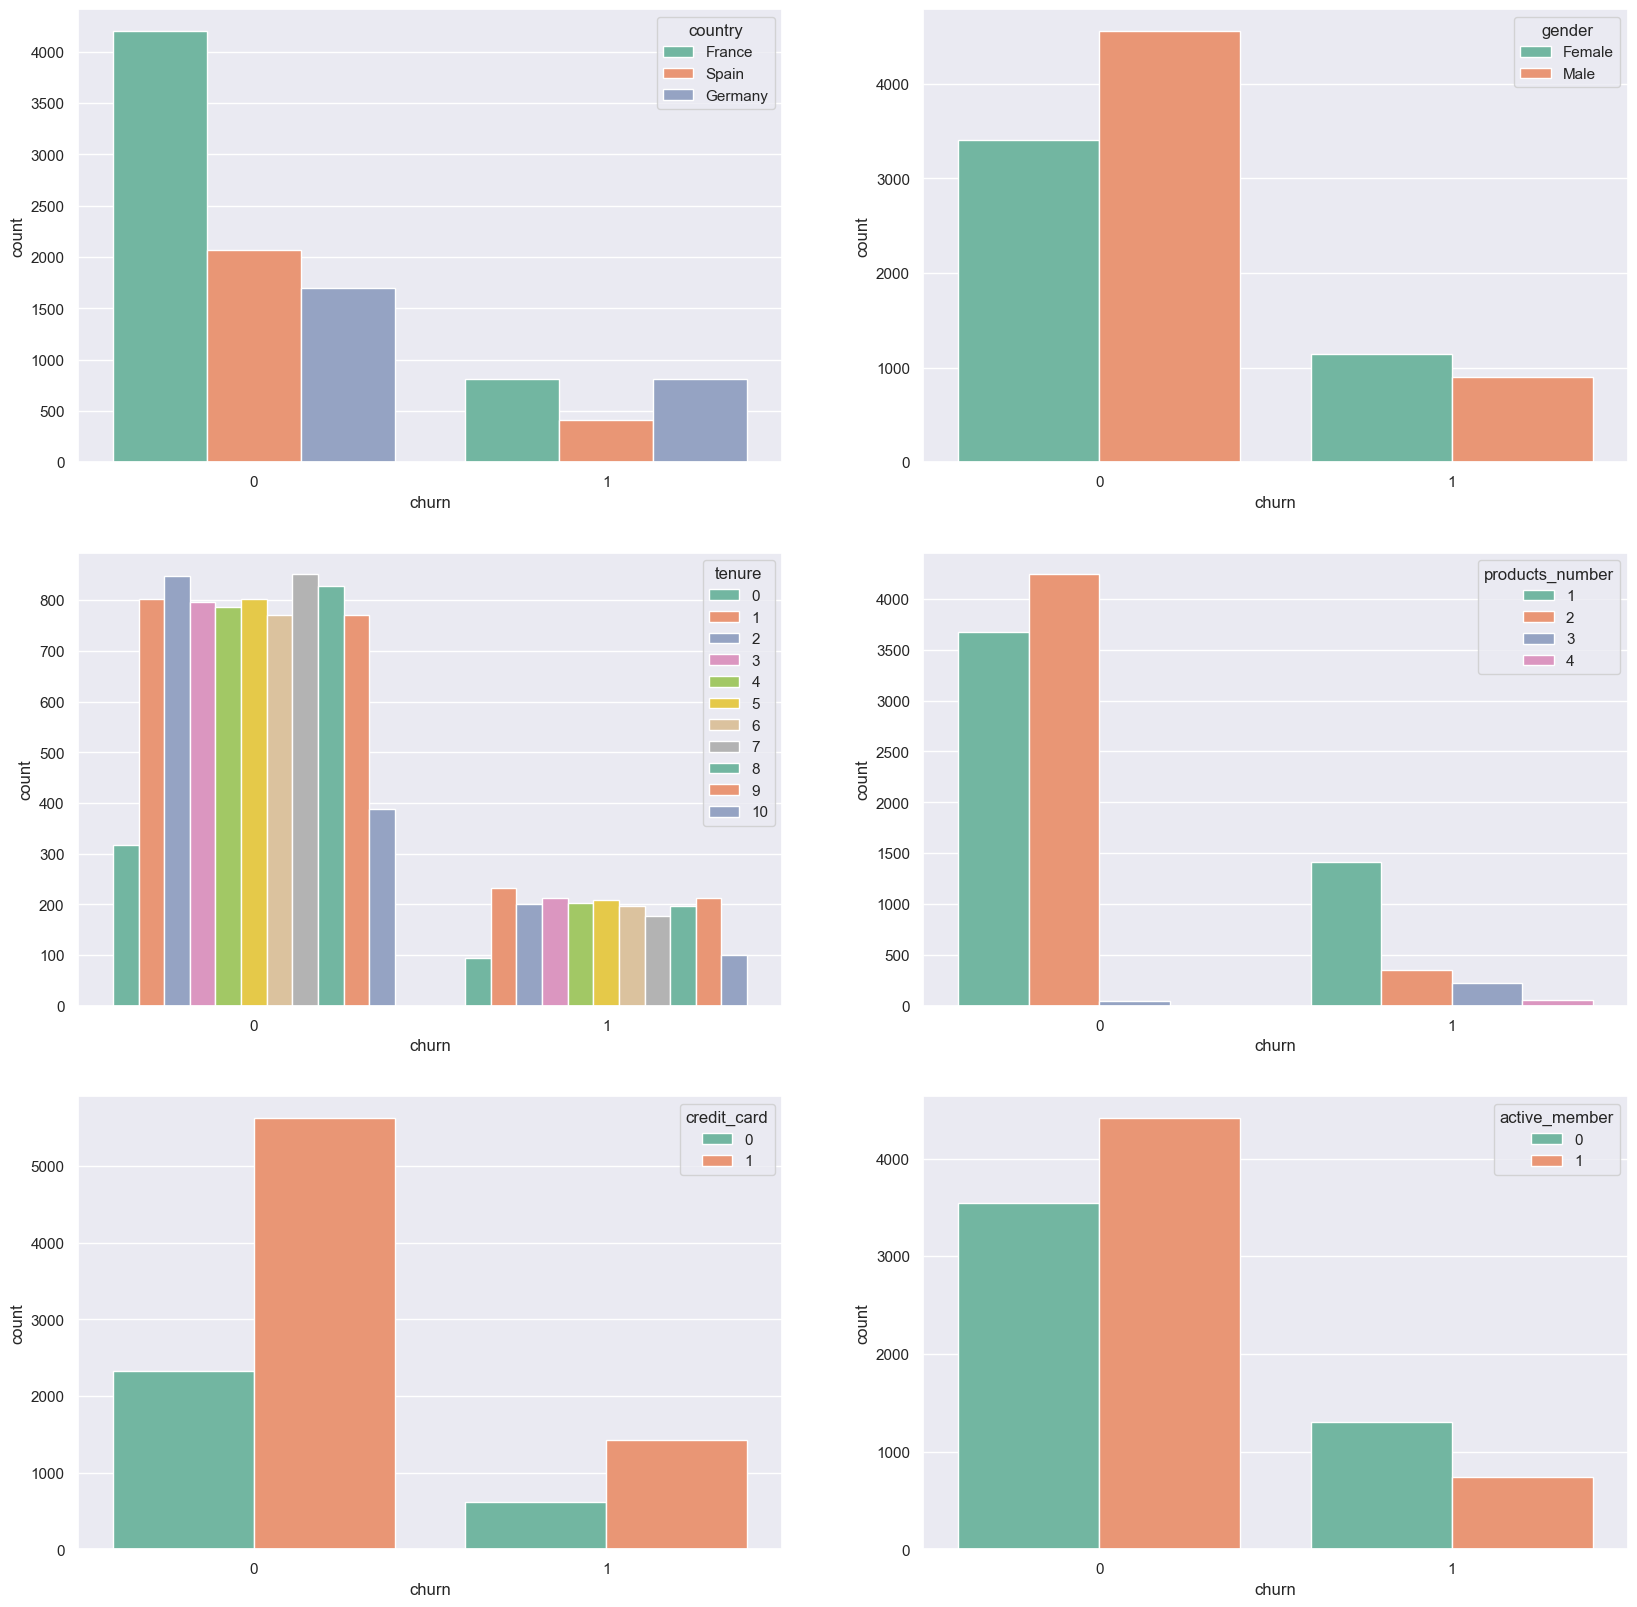

In [24]:
plt.figure(figsize = (20,20))

plt.subplot(3,2,1)
sns.countplot(x = 'churn', hue= 'country', palette='Set2', data = dataframe)

plt.subplot(3,2,2)
sns.countplot(x = 'churn', hue= 'gender', palette='Set2', data = dataframe)

plt.subplot(3,2,3)
sns.countplot(x = 'churn', hue= 'tenure', palette='Set2', data = dataframe)

plt.subplot(3,2,4)
sns.countplot(x = 'churn', hue= 'products_number', palette='Set2', data = dataframe)

plt.subplot(3,2,5)
sns.countplot(x = 'churn', hue= 'credit_card', palette='Set2', data = dataframe)

plt.subplot(3,2,6)
sns.countplot(x = 'churn', hue= 'active_member', palette='Set2', data = dataframe)

When we look at the credit score variable, we can't see much difference between the scores and the chance of churn.

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


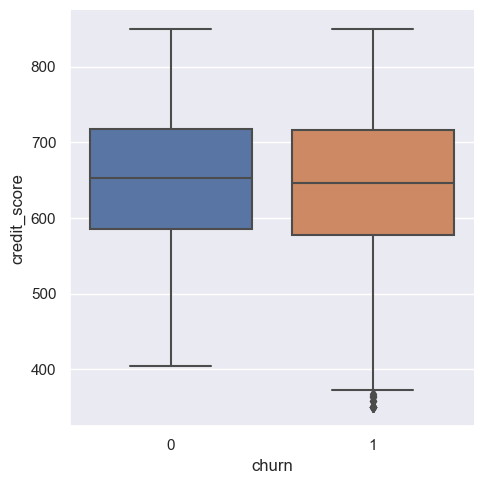

In [25]:
sns.catplot(x = 'churn', y="credit_score", kind="box", data = dataframe)

Looking at the age variable, we can see that older people are generally more prone to churn

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


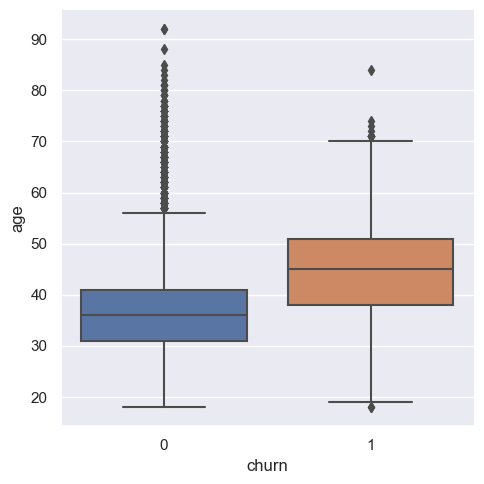

In [26]:
sns.catplot(x = 'churn', y="age", kind="box", data = dataframe)

When we look at balance variable, we can't see much difference between the scores and the chance of churn.


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


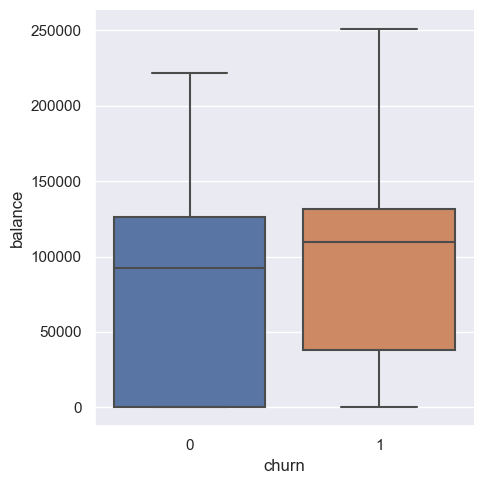

In [27]:
sns.catplot(x = 'churn', y="balance", kind="box", data = dataframe)

When we look at the estimated_salary variable, we can't see much difference between the scores and the chance of churn.

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


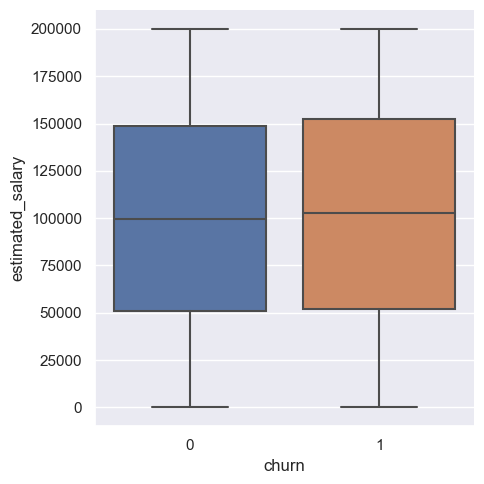

In [28]:
sns.catplot(x = 'churn', y="estimated_salary", kind="box", data = dataframe)

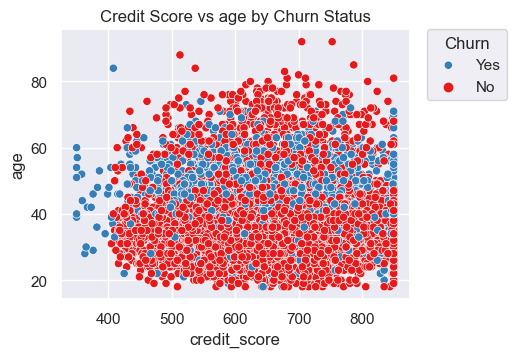

In [29]:
plt.figure(figsize=(4.5, 3.5))
sns.scatterplot(x='credit_score', y='age', hue='churn', data=dataframe, palette='Set1')
plt.legend(title='Churn', labels=[legend_labels[x] for x in dataframe['churn'].unique()], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.title('Credit Score vs age by Churn Status')
plt.xlabel('credit_score')
plt.ylabel('age')
plt.show()

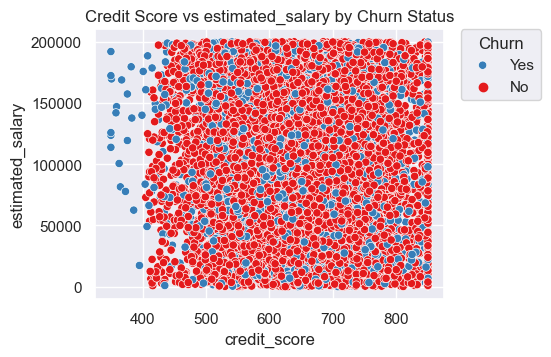

In [30]:
plt.figure(figsize=(4.5, 3.5))
sns.scatterplot(x='credit_score', y='estimated_salary', hue='churn', data=dataframe, palette='Set1')
plt.legend(title='Churn', labels=[legend_labels[x] for x in dataframe['churn'].unique()], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.title('Credit Score vs estimated_salary by Churn Status')
plt.xlabel('credit_score')
plt.ylabel('estimated_salary')
plt.show()

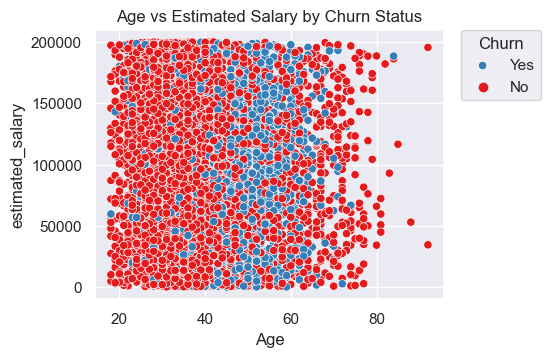

In [31]:
plt.figure(figsize=(4.5, 3.5))
sns.scatterplot(x='age', y='estimated_salary', hue='churn', data=dataframe, palette='Set1')
plt.legend(title='Churn', labels=[legend_labels[x] for x in dataframe['churn'].unique()], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.title('Age vs Estimated Salary by Churn Status')
plt.xlabel('Age')
plt.ylabel('estimated_salary')
plt.show()

- High Credit Score with below age 50 are less likely to Churn
- Whose Credit Score is high but age is above 50 are more likely to Churn

In [32]:
iqr1,iqr2=np.percentile(dataframe['age'],[75,25])
IQR=np.subtract(iqr1,iqr2)

In [33]:
upper_limit = iqr1 + 1.5*IQR
lower_limit=iqr2 - 1.5*IQR
print(f"Upper Limit : {upper_limit}\nLower Limit : {lower_limit}")

Upper Limit : 62.0
Lower Limit : 14.0


In [34]:
churn1=dataframe.loc[(dataframe['age'] <= upper_limit) & (dataframe['age'] >= lower_limit)]

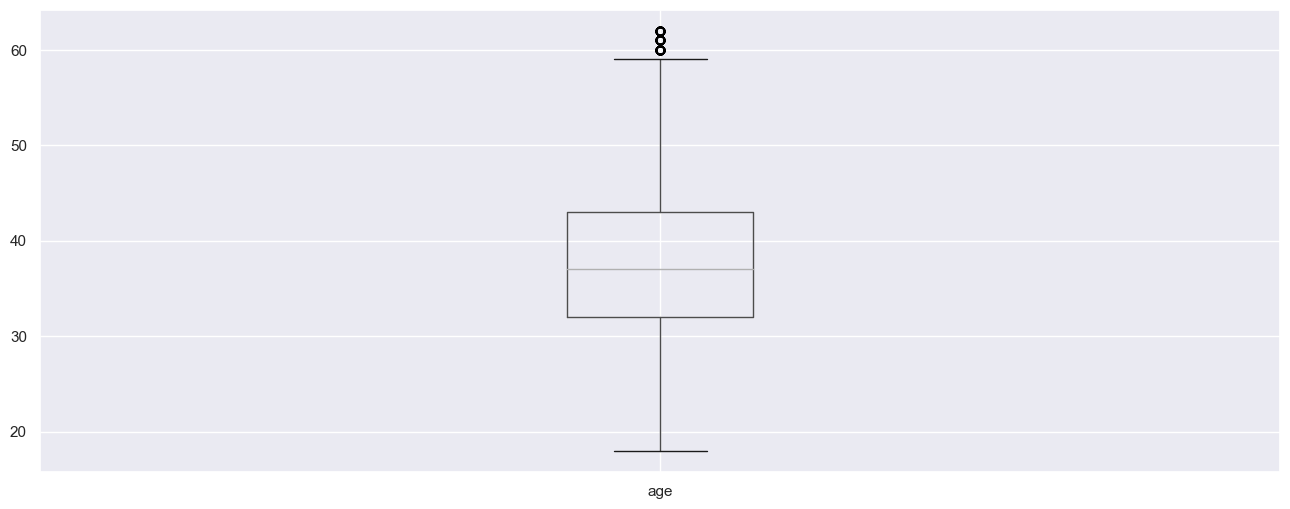

In [35]:
churn1.boxplot(column=['age'],figsize=(16,6))
plt.show()

In [36]:
iqr1,iqr2=np.percentile(dataframe['credit_score'],[75,25])
IQR=np.subtract(iqr1,iqr2)

In [37]:
upper_limit = iqr1 + 1.5*IQR
lower_limit=iqr2 - 1.5*IQR
print(f"Upper Limit : {upper_limit}\nLower Limit : {lower_limit}")

Upper Limit : 919.0
Lower Limit : 383.0


In [38]:
churn2=dataframe.loc[(dataframe['credit_score'] <= upper_limit) & (dataframe['credit_score'] >= lower_limit)]

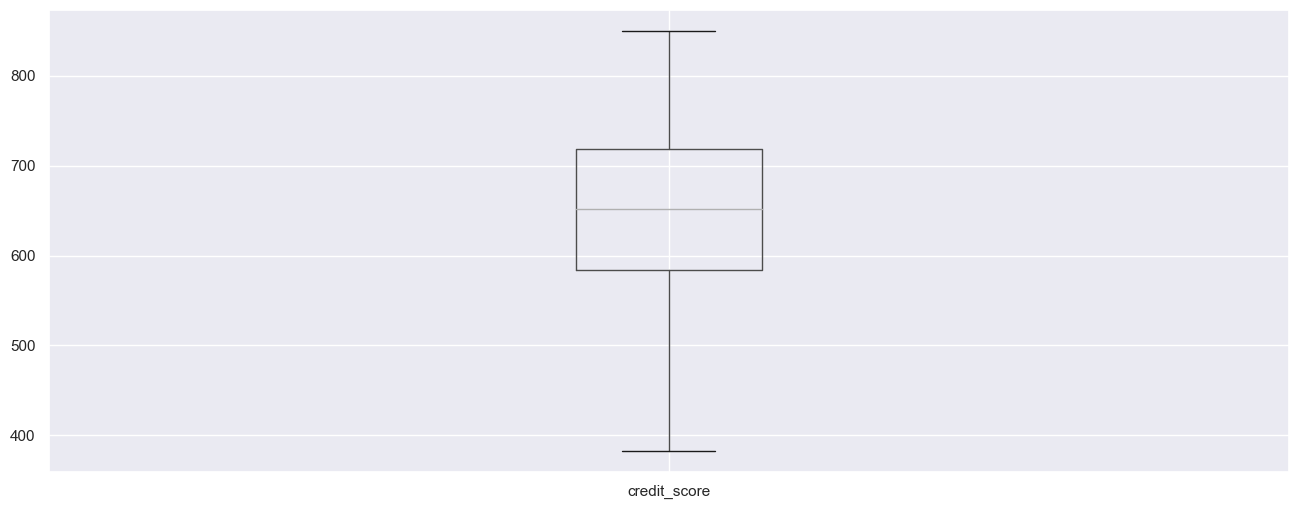

In [39]:
churn2.boxplot(column=['credit_score'],figsize=(16,6))
plt.show()

## Data preprocessing

In [40]:
country = pd.get_dummies(dataframe["country"]).astype(int)
country.head()

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


In [41]:
gender = pd.DataFrame()
gender["Female"] = dataframe["gender"].map({"Male": 0, "Female": 1})
gender.head()

,Female
0,1
1,1
2,1
3,1
4,1


In [42]:
dataframe = pd.concat([dataframe, country, gender], axis = 1)
dataframe.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,France,Germany,Spain,Female
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0,1
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1


In [43]:
dataframe.drop(["customer_id", "country", "gender"], axis = 1, inplace = True)
dataframe.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,France,Germany,Spain,Female
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1


# Machine Learning Models

In [44]:
x = dataframe.drop('churn', axis = 1)
y = dataframe[["churn"]]

In [45]:
import statsmodels.api as sm
x = sm.add_constant(x)
mod = sm.OLS(y, x)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  churn   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     161.2
Date:                Sun, 10 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:24:28   Log-Likelihood:                -4277.7
No. Observations:               10000   AIC:                             8579.
Df Residuals:                    9988   BIC:                             8666.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0836      0.025  

### Logistic Regression

In [46]:
from sklearn.model_selection import train_test_split
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3)

In [47]:
scaler = StandardScaler()
x_training_data = scaler.fit_transform(x_training_data)
x_test_data = scaler.transform(x_test_data)
y_training_data = np.ravel(y_training_data)

In [48]:
#Create the model
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()

In [49]:
model1.fit(x_training_data, y_training_data)
predictions1 = model1.predict(x_test_data)

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test_data, predictions1))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      2389
           1       0.63      0.21      0.31       611

    accuracy                           0.81      3000
   macro avg       0.73      0.59      0.60      3000
weighted avg       0.79      0.81      0.77      3000



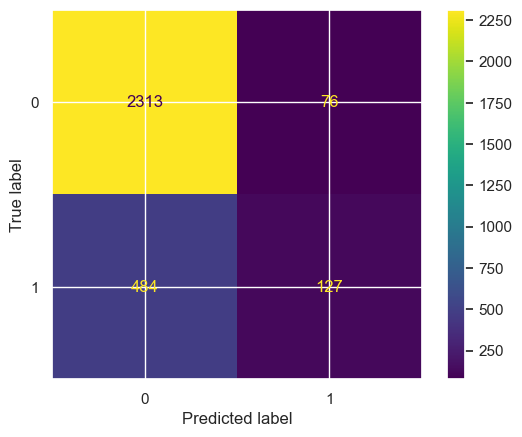

In [51]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
x, y = make_classification(random_state=0)

clf = SVC(random_state=0)
clf.fit(x_training_data, y_training_data)
cm = confusion_matrix(y_test_data, predictions1, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

In [52]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_data, predictions1))

[[2313   76]
 [ 484  127]]


In [53]:
from sklearn.metrics import accuracy_score
log_score =accuracy_score(y_test_data,predictions1)

In [54]:
log_score
log_score = f"{log_score:.5f}"
print('Logistic Regression Score is ',log_score)

Logistic Regression Score is  0.81333


In [55]:
from sklearn.metrics import mean_squared_error

logistic_mse = mean_squared_error(y_test_data, predictions1)
logistic_rmse = mean_squared_error(y_test_data, predictions1, squared=False)

In [56]:
print("Logistic Regression MSE: {:.5f}".format(logistic_mse))
print("Logistic Regression RMSE: {:.5f}".format(logistic_rmse))

Logistic Regression MSE: 0.18667
Logistic Regression RMSE: 0.43205


### Decision Tree Classifier

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_graphviz

In [58]:
model2=DecisionTreeClassifier()

In [59]:
model2.fit(x_training_data,y_training_data)
predictions2=model2.predict(x_test_data)

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test_data,predictions2))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2389
           1       0.50      0.53      0.52       611

    accuracy                           0.80      3000
   macro avg       0.69      0.70      0.69      3000
weighted avg       0.80      0.80      0.80      3000



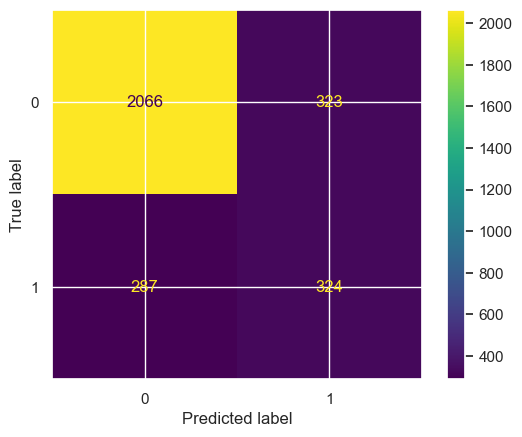

In [61]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
x, y = make_classification(random_state=0)

clf = SVC(random_state=0)
clf.fit(x_training_data, y_training_data)
cm = confusion_matrix(y_test_data, predictions2, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

In [62]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_data,predictions2))

[[2066  323]
 [ 287  324]]


In [63]:
from sklearn.metrics import accuracy_score
DTR_score =accuracy_score(y_test_data,predictions2)
DTR_score = f"{DTR_score:.5f}"
print('Decision Tree Classifier Score is ',DTR_score)

Decision Tree Classifier Score is  0.79667


In [64]:
decision_tree_mse = mean_squared_error(y_test_data, predictions2)
decision_tree_rmse = mean_squared_error(y_test_data, predictions2, squared=False)

In [65]:
print("Decision Tree MSE: {:.5f}".format(decision_tree_mse))
print("Decision Tree RMSE: {:.5f}".format(decision_tree_rmse))

Decision Tree MSE: 0.20333
Decision Tree RMSE: 0.45092


### Naive Bayes

In [66]:
from sklearn.naive_bayes import GaussianNB

In [67]:
model3= GaussianNB()

In [68]:
model3.fit(x_training_data,y_training_data)
predictions3=model3.predict(x_test_data)

In [69]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_data,predictions3))

[[2229  160]
 [ 371  240]]


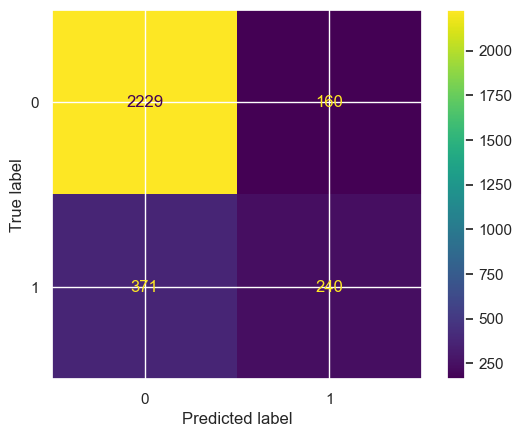

In [70]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
x, y = make_classification(random_state=0)

clf = SVC(random_state=0)
clf.fit(x_training_data, y_training_data)
cm = confusion_matrix(y_test_data, predictions3, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

In [71]:
from sklearn.metrics import accuracy_score
NB_score =accuracy_score(y_test_data,predictions3)
NB_score = f"{NB_score:.5f}"
print('Naive Bayesian Score is ',NB_score)

Naive Bayesian Score is  0.82300


In [72]:
naive_bayes_mse = mean_squared_error(y_test_data, predictions3)
naive_bayes_rmse = mean_squared_error(y_test_data, predictions3, squared=False)

In [73]:
print("Naive Bayesian MSE: {:.5f}".format(naive_bayes_mse))
print("Naive Bayesian RMSE: {:.5f}".format(naive_bayes_rmse))

Naive Bayesian MSE: 0.17700
Naive Bayesian RMSE: 0.42071


### Random Forest

In [74]:
from sklearn.ensemble import RandomForestRegressor
model4 = RandomForestRegressor()

In [75]:
model4.fit(x_training_data, y_training_data)
predictions4 = model4.predict(x_test_data)
print(predictions4)

[0.75 0.78 0.02 ... 0.01 0.   0.01]


In [76]:
predictions4 = (predictions4 > 0.5).astype(int)

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test_data,predictions4))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2389
           1       0.75      0.51      0.61       611

    accuracy                           0.87      3000
   macro avg       0.82      0.73      0.76      3000
weighted avg       0.86      0.87      0.86      3000



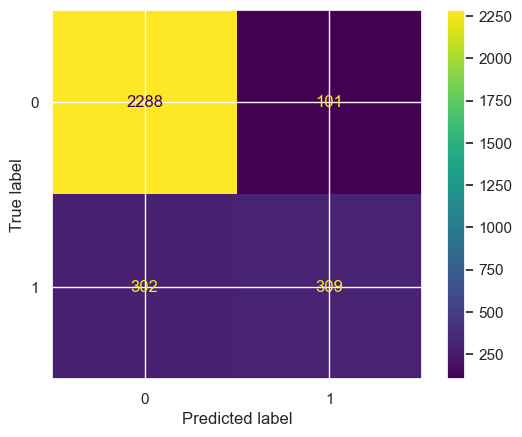

In [78]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, y = make_classification(random_state=0)

clf = SVC(random_state=0)
clf.fit(x_training_data, y_training_data)
cm = confusion_matrix(y_test_data, predictions4, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

In [79]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_data,predictions4))

[[2288  101]
 [ 302  309]]


In [80]:
from sklearn.metrics import accuracy_score
RF_score =accuracy_score(y_test_data,predictions4)
RF_score = f"{RF_score:.5f}"
print('Random Forest Algorithm Score is ',RF_score)

Random Forest Algorithm Score is  0.86567


In [81]:
random_forest_mse = mean_squared_error(y_test_data, predictions4)
random_forest_rmse = mean_squared_error(y_test_data, predictions4, squared=False)

In [82]:
print("Random Forest MSE: {:.5f}".format(random_forest_mse))
print("Random Forest RMSE: {:.5f}".format(random_forest_rmse))

Random Forest MSE: 0.13433
Random Forest RMSE: 0.36652


### Lasso

In [83]:
from sklearn.linear_model import Lasso
model5=Lasso()

In [84]:
model5.fit(x_training_data,y_training_data)
predictions5=model5.predict(x_test_data)
predictions5 = (predictions5 > 0.5).astype(int)

In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_test_data,predictions5))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2389
           1       0.00      0.00      0.00       611

    accuracy                           0.80      3000
   macro avg       0.40      0.50      0.44      3000
weighted avg       0.63      0.80      0.71      3000



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


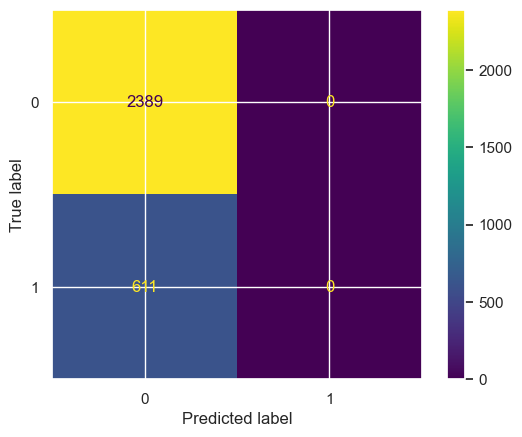

In [86]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, y = make_classification(random_state=0)

clf = SVC(random_state=0)
clf.fit(x_training_data, y_training_data)
cm = confusion_matrix(y_test_data, predictions5
                    , labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

In [87]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_data,predictions5))

[[2389    0]
 [ 611    0]]


In [88]:
from sklearn.metrics import accuracy_score
Lasso_score =accuracy_score(y_test_data,predictions5)
Lasso_score = f"{Lasso_score:.5f}"
print('Lasso Regression Score is ',Lasso_score)

Lasso Regression Score is  0.79633


In [89]:
lasso_mse = mean_squared_error(y_test_data, predictions5)
lasso_rmse = mean_squared_error(y_test_data, predictions5, squared=False)

In [90]:
print("Lasso Regression MSE: {:.5f}".format(lasso_mse))
print("Lasso Regression RMSE: {:.5f}".format(lasso_rmse))

Lasso Regression MSE: 0.20367
Lasso Regression RMSE: 0.45129


### Ridge

In [91]:
from sklearn.linear_model import Ridge
model6=Ridge()

In [92]:
model6.fit(x_training_data,y_training_data)
predictions6=model6.predict(x_test_data)
predictions6 = (predictions6 > 0.5).astype(int)

In [93]:
from sklearn.metrics import classification_report
print(classification_report(y_test_data, predictions6))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      2389
           1       0.66      0.13      0.21       611

    accuracy                           0.81      3000
   macro avg       0.74      0.56      0.55      3000
weighted avg       0.78      0.81      0.75      3000



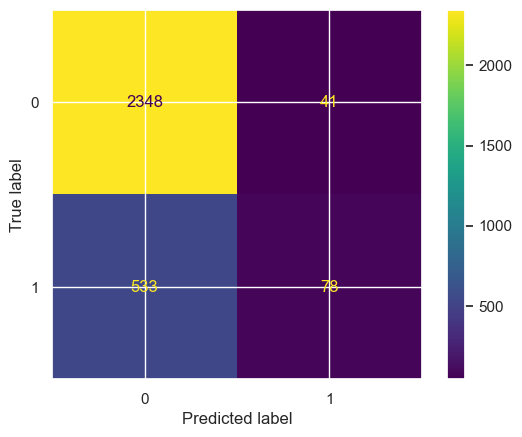

In [94]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, y = make_classification(random_state=0)

clf = SVC(random_state=0)
clf.fit(x_training_data, y_training_data)
cm = confusion_matrix(y_test_data, predictions6
                    , labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

In [95]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_data,predictions6))

[[2348   41]
 [ 533   78]]


In [96]:
from sklearn.metrics import accuracy_score
Ridge_score =accuracy_score(y_test_data,predictions6)
Ridge_score = f"{Ridge_score:.5f}"
print('Ridge Regression Score is ',Ridge_score)

Ridge Regression Score is  0.80867


In [97]:
ridge_mse = mean_squared_error(y_test_data, predictions6)
ridge_rmse = mean_squared_error(y_test_data, predictions6, squared=False)

In [98]:
print("Ridge Regression MSE: {:.5f}".format(ridge_mse))
print("Ridge Regression RMSE: {:.5f}".format(ridge_rmse))


Ridge Regression MSE: 0.19133
Ridge Regression RMSE: 0.43742


# Comparing RMSE of Different Models

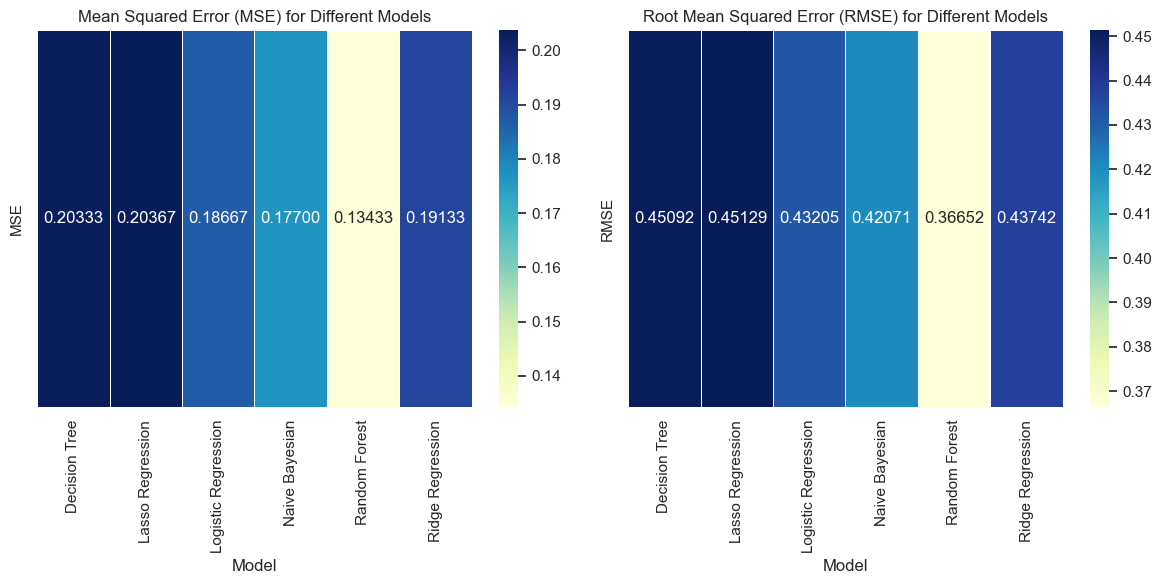

In [99]:
import seaborn as sns
import pandas as pd

mse_values = {
    'Logistic Regression': logistic_mse,
    'Lasso Regression': lasso_mse,
    'Ridge Regression': ridge_mse,
    'Decision Tree': decision_tree_mse,
    'Naive Bayesian': naive_bayes_mse,
    'Random Forest': random_forest_mse
}

rmse_values = {
    'Logistic Regression': logistic_rmse,
    'Lasso Regression': lasso_rmse,
    'Ridge Regression': ridge_rmse,
    'Decision Tree': decision_tree_rmse,
    'Naive Bayesian': naive_bayes_rmse,
    'Random Forest': random_forest_rmse
}

# Convert the dictionaries to DataFrames for seaborn
mse_df = pd.DataFrame(list(mse_values.items()), columns=['Model', 'MSE'])
rmse_df = pd.DataFrame(list(rmse_values.items()), columns=['Model', 'RMSE'])

# Display the tabular representation using seaborn heatmap
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

# Display MSE table
plt.subplot(1, 2, 1)
heatmap_mse = sns.heatmap(pd.pivot_table(mse_df, values='MSE', columns='Model'), annot=True, cmap="YlGnBu", fmt=".5f", linewidths=.5)
heatmap_mse.set_title('Mean Squared Error (MSE) for Different Models')

# Display RMSE table
plt.subplot(1, 2, 2)
heatmap_rmse = sns.heatmap(pd.pivot_table(rmse_df, values='RMSE', columns='Model'), annot=True, cmap="YlGnBu", fmt=".5f", linewidths=.5)
heatmap_rmse.set_title('Root Mean Squared Error (RMSE) for Different Models')

plt.tight_layout()
plt.show()


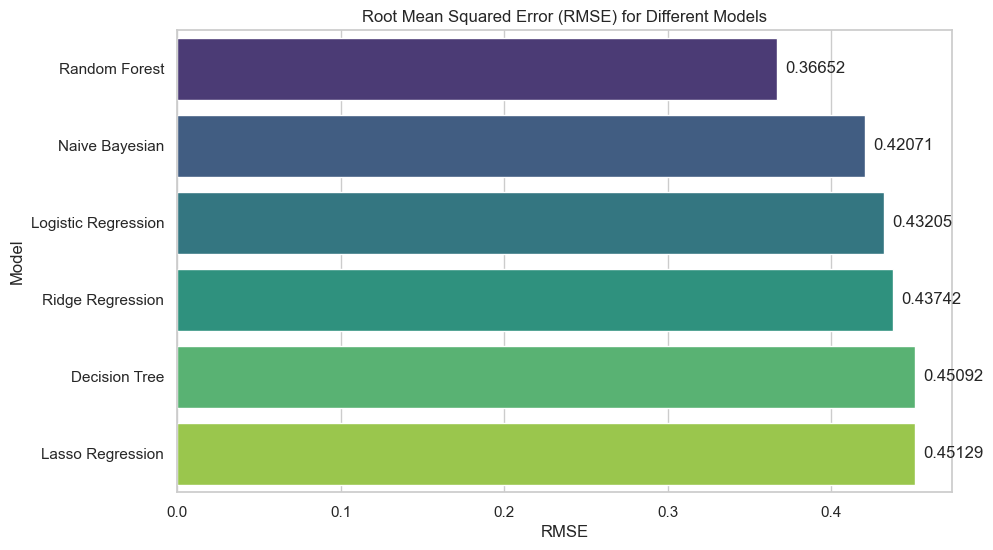

In [100]:
import seaborn as sns
import pandas as pd

rmse_values = {
    'Logistic Regression': logistic_rmse,
    'Lasso Regression': lasso_rmse,
    'Ridge Regression': ridge_rmse,
    'Decision Tree': decision_tree_rmse,
    'Naive Bayesian': naive_bayes_rmse,
    'Random Forest': random_forest_rmse
}

# Convert the dictionary to a DataFrame for seaborn
rmse_df = pd.DataFrame(list(rmse_values.items()), columns=['Model', 'RMSE'])

# Sort the DataFrame by RMSE in ascending order
rmse_df = rmse_df.sort_values(by='RMSE')

# Plot a bar chart with values on top of each bar
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='RMSE', y='Model', data=rmse_df, palette='viridis')

# Add values on top of each bar
for bar, value in zip(ax.patches, rmse_df['RMSE']):
    ax.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height() / 2, f'{value:.5f}', ha='left', va='center')

plt.title('Root Mean Squared Error (RMSE) for Different Models')
plt.xlabel('RMSE')
plt.ylabel('Model')
plt.show()


Low RMSE is better, hence Random Forest is the best model for this

# ENSEMBLE MODELS

## Gradient Boosting

In [101]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [102]:
base_models = [predictions1,predictions2,predictions3,predictions4,predictions5,predictions6]

In [103]:
# Combine predictions from base models
ensemble_input = np.array(base_models).T

In [105]:
# Train Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=0)
gb_model.fit(ensemble_input, y_test_data)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(random_state=0)

In [107]:
# Make predictions using the ensemble model
gb_predictions = gb_model.predict(ensemble_input)

In [108]:
# Calculate MSE and RMSE for Gradient Boosting
gb_mse = mean_squared_error(y_test_data, gb_predictions)
gb_rmse = mean_squared_error(y_test_data, gb_predictions, squared=False)

In [109]:
print("Gradient Boosting MSE: {:.5f}".format(gb_mse))
print("Gradient Boosting RMSE: {:.5f}".format(gb_rmse))

Gradient Boosting MSE: 0.10788
Gradient Boosting RMSE: 0.32846


## XGBoost

In [110]:
#pip install xgboost
import xgboost as xgb

In [111]:
# Train XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=0)
xgb_model.fit(ensemble_input, y_test_data)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [112]:
# Make predictions using the ensemble model
xgb_predictions = xgb_model.predict(ensemble_input)

In [129]:
# Calculate MSE and RMSE for XGBoost
xgb_mse = mean_squared_error(y_test_data, xgb_predictions)
xgb_rmse = sqrt(xgb_mse)

print("XGB MSE: {:.5f}".format(xgb_mse))
print("XGB RMSE: {:.5f}".format(xgb_rmse))

XGB MSE: 0.10769
XGB RMSE: 0.32816


## AdaBoost (Adaptive Boosting)

In [130]:
from sklearn.ensemble import AdaBoostClassifier
from math import sqrt

In [131]:
# Train XGBoost model
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=0)
adaboost_model.fit(x_training_data, y_training_data)

AdaBoostClassifier(random_state=0)

In [132]:
# Make predictions
adaboost_predictions = adaboost_model.predict(x_test_data)

In [133]:
adaboost_mse = mean_squared_error(y_test_data, adaboost_predictions)
adaboost_rmse = sqrt(adaboost_mse)

print("AdaBoost MSE: {:.5f}".format(adaboost_mse))
print("AdaBoost RMSE: {:.5f}".format(adaboost_rmse))

AdaBoost MSE: 0.13667
AdaBoost RMSE: 0.36968


## Light GBM

In [134]:
#pip install lightgbm
import lightgbm as lgb

In [135]:
# Convert the data to LightGBM format
train_data = lgb.Dataset(x_training_data, label=y_training_data)
test_data = lgb.Dataset(x_test_data, label=y_test_data, reference=train_data)

In [136]:
# Set parameters and train LightGBM model
params = {'objective': 'regression', 'metric': 'rmse'}
lightgbm_model = lgb.train(params, train_data, valid_sets=[train_data, test_data], num_boost_round=100)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001587 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 863
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 12
[LightGBM] [Info] Start training from score 0.203714


In [137]:
# Make predictions
lightgbm_predictions = lightgbm_model.predict(x_test_data, num_iteration=lightgbm_model.best_iteration)

In [138]:
lightgbm_mse = mean_squared_error(y_test_data, lightgbm_predictions)
lightgbm_rmse = sqrt(lightgbm_mse)

print("LightGBM MSE: {:.5f}".format(lightgbm_mse))
print("LightGBM RMSE: {:.5f}".format(lightgbm_rmse))

LightGBM MSE: 0.09761
LightGBM RMSE: 0.31243


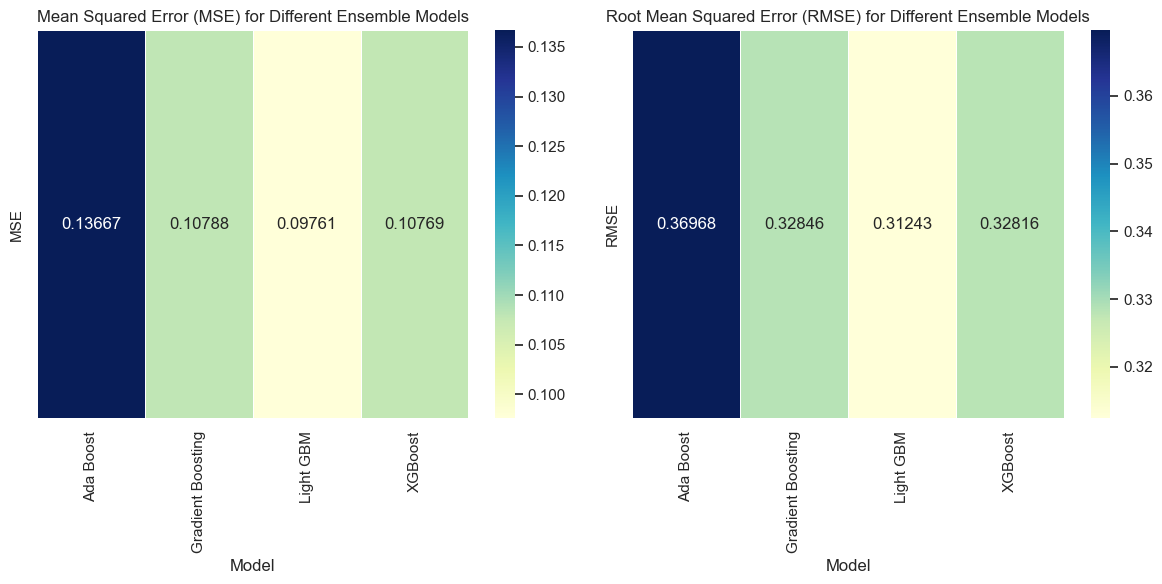

In [139]:
import seaborn as sns
import pandas as pd

mse_values_E = {
    'Gradient Boosting': gb_mse,
    'XGBoost': xgb_mse,
    'Ada Boost': adaboost_mse,
    'Light GBM': lightgbm_mse,
}

rmse_values_E = {
    'Gradient Boosting': gb_rmse,
    'XGBoost': xgb_rmse,
    'Ada Boost': adaboost_rmse,
    'Light GBM': lightgbm_rmse,
}

# Convert the dictionaries to DataFrames for seaborn
mse_df_E = pd.DataFrame(list(mse_values_E.items()), columns=['Model', 'MSE'])
rmse_df_E = pd.DataFrame(list(rmse_values_E.items()), columns=['Model', 'RMSE'])

# Display the tabular representation using seaborn heatmap
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

# Display MSE table
plt.subplot(1, 2, 1)
heatmap_mse_E = sns.heatmap(pd.pivot_table(mse_df_E, values='MSE', columns='Model'), annot=True, cmap="YlGnBu", fmt=".5f", linewidths=.5)
heatmap_mse_E.set_title('Mean Squared Error (MSE) for Different Ensemble Models')

# Display RMSE table
plt.subplot(1, 2, 2)
heatmap_rmse_E = sns.heatmap(pd.pivot_table(rmse_df_E, values='RMSE', columns='Model'), annot=True, cmap="YlGnBu", fmt=".5f", linewidths=.5)
heatmap_rmse_E.set_title('Root Mean Squared Error (RMSE) for Different Ensemble Models')

plt.tight_layout()
plt.show()


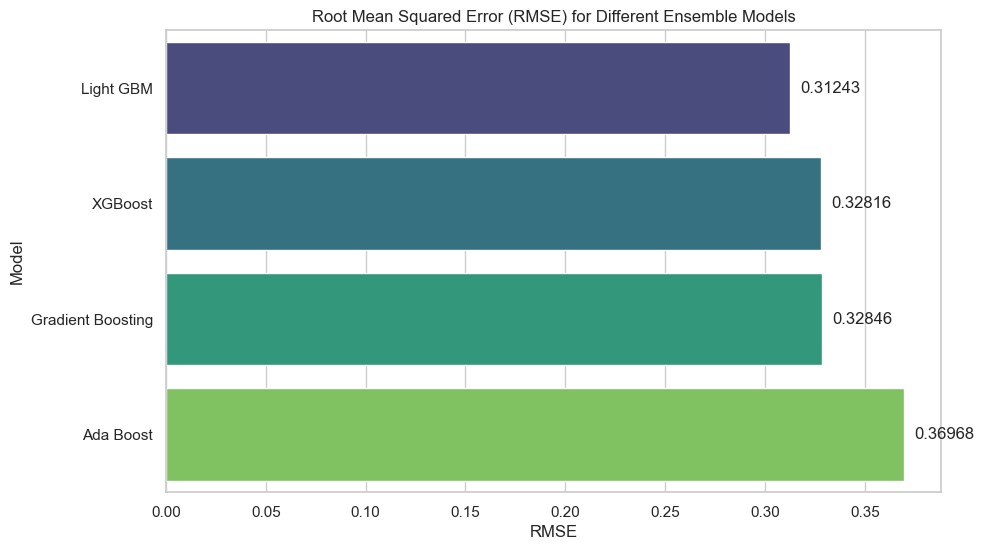

In [140]:
import seaborn as sns
import pandas as pd

rmse_values_E = {
    'Gradient Boosting': gb_rmse,
    'XGBoost': xgb_rmse,
    'Ada Boost': adaboost_rmse,
    'Light GBM': lightgbm_rmse,
}

# Convert the dictionary to a DataFrame for seaborn
rmse_df_E = pd.DataFrame(list(rmse_values_E.items()), columns=['Model', 'RMSE'])

# Sort the DataFrame by RMSE in ascending order
rmse_df_E = rmse_df_E.sort_values(by='RMSE')

# Plot a bar chart with values on top of each bar
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='RMSE', y='Model', data=rmse_df_E, palette='viridis')

# Add values on top of each bar
for bar, value in zip(ax.patches, rmse_df_E['RMSE']):
    ax.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height() / 2, f'{value:.5f}', ha='left', va='center')

plt.title('Root Mean Squared Error (RMSE) for Different Ensemble Models')
plt.xlabel('RMSE')
plt.ylabel('Model')
plt.show()


Light GBM has the lowest MSE among these Ensemble Models

## k-Nearest Neighbors (kNN)

In [141]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from math import sqrt

In [142]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_training_data, y_training_data)

KNeighborsClassifier()

In [143]:
# Make predictions
knn_predictions = knn_model.predict(x_test_data)

In [144]:
knn_mse = mean_squared_error(y_test_data, knn_predictions)
knn_rmse  = sqrt(knn_mse)

print("KNN MSE: {:.5f}".format(knn_mse))
print("KNN RMSE: {:.5f}".format(knn_rmse))

KNN MSE: 0.16733
KNN RMSE: 0.40906


## Neural Network with 3 Hidden Layers

In [145]:
#pip install tensorflow
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from math import sqrt

In [146]:
NN_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(x_training_data.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Assuming binary classification
])

In [147]:
# Compile the model
NN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [148]:
# Train the model
NN_model.fit(x_training_data, y_training_data, epochs=10, batch_size=32, validation_data=(x_test_data, y_test_data), verbose=1)

Epoch 1/10


219/219 [==============================] - 5s 11ms/step - loss: 0.4546 - accuracy: 0.8086 - val_loss: 0.4046 - val_accuracy: 0.8327
Epoch 2/10
219/219 [==============================] - 2s 7ms/step - loss: 0.3989 - accuracy: 0.8317 - val_loss: 0.3719 - val_accuracy: 0.8597
Epoch 3/10
219/219 [==============================] - 2s 9ms/step - loss: 0.3688 - accuracy: 0.8474 - val_loss: 0.3438 - val_accuracy: 0.8633
Epoch 4/10
219/219 [==============================] - 2s 7ms/step - loss: 0.3513 - accuracy: 0.8557 - val_loss: 0.3365 - val_accuracy: 0.8643
Epoch 5/10
219/219 [==============================] - 1s 6ms/step - loss: 0.3444 - accuracy: 0.8590 - val_loss: 0.3314 - val_accuracy: 0.8660
Epoch 6/10
219/219 [==============================] - 1s 5ms/step - loss: 0.3392 - accuracy: 0.8589 - val_loss: 0.3343 - val_accuracy: 0.8657
Epoch 7/10
219/219 [==============================] - 1s 5ms/step - loss: 0.3344 - accuracy: 0.8624 - val_loss: 0.3346 - val_accuracy: 0.8643
Epo

In [149]:
# Make predictions
nn_predictions = NN_model.predict(x_test_data)
nn_predictions = (nn_predictions > 0.5).astype(int)

94/94 [==============================] - 1s 3ms/step


In [154]:
nn_mse = mean_squared_error(y_test_data, nn_predictions)
nn_rmse  = sqrt(nn_mse)

print("Neural Network with 3 Hidden Layers MSE: {:.5f}".format(nn_mse))
print("Neural Network with 3 Hidden Layers RMSE: {:.5f}".format(nn_rmse))

Neural Network with 3 Hidden Layers MSE: 0.13700
Neural Network with 3 Hidden Layers RMSE: 0.37014


# Putting All Models Together

## Finding RMSE and Winner Model with Lowest RMSE

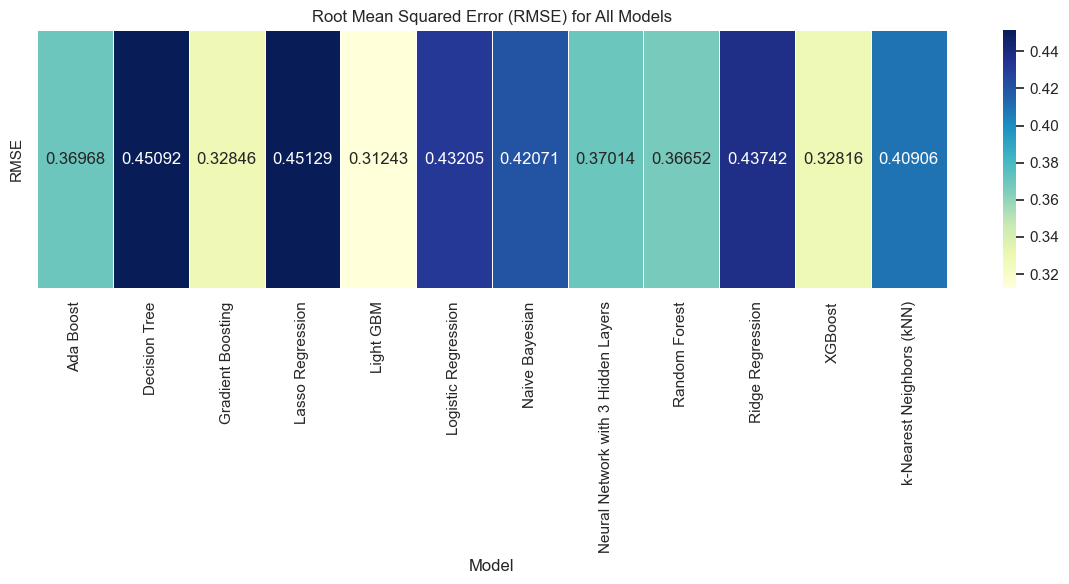

In [155]:
import seaborn as sns
import pandas as pd

rmse_values_All = {
    'Logistic Regression': logistic_rmse,
    'Lasso Regression': lasso_rmse,
    'Ridge Regression': ridge_rmse,
    'Decision Tree': decision_tree_rmse,
    'Naive Bayesian': naive_bayes_rmse,
    'Random Forest': random_forest_rmse,
    'Gradient Boosting': gb_rmse,
    'XGBoost': xgb_rmse,
    'Ada Boost': adaboost_rmse,
    'Light GBM': lightgbm_rmse,
    'k-Nearest Neighbors (kNN)': knn_rmse,
    'Neural Network with 3 Hidden Layers': nn_rmse
}

# Convert the dictionaries to DataFrames for seaborn
rmse_df_All = pd.DataFrame(list(rmse_values_All.items()), columns=['Model', 'RMSE'])

# Display the tabular representation using seaborn heatmap
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

# Display RMSE table
heatmap_rmse_All = sns.heatmap(pd.pivot_table(rmse_df_All, values='RMSE', columns='Model'), annot=True, cmap="YlGnBu", fmt=".5f", linewidths=.5)
heatmap_rmse_All.set_title('Root Mean Squared Error (RMSE) for All Models')

plt.tight_layout()
plt.show()


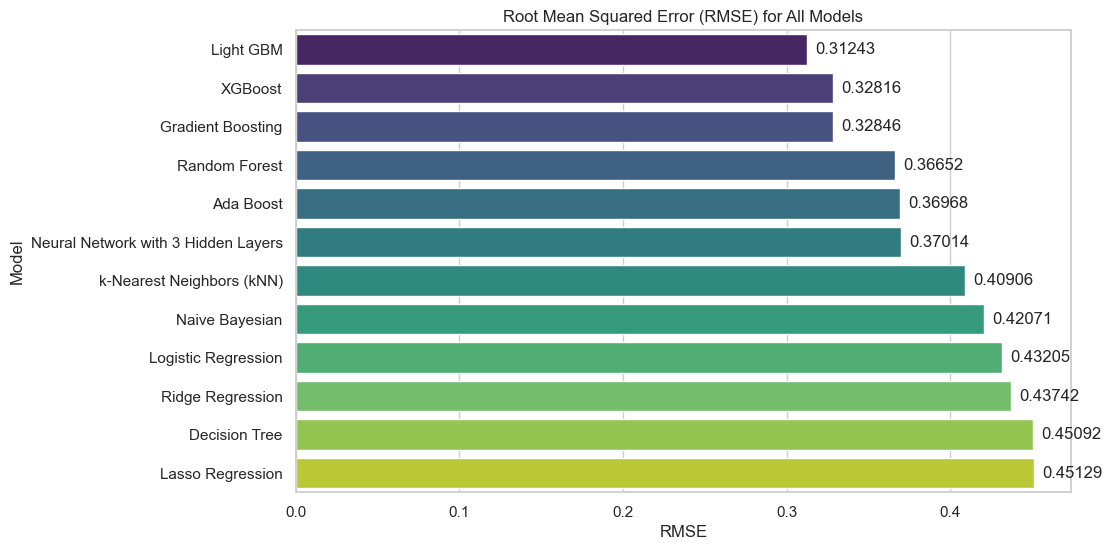

In [156]:
import seaborn as sns
import pandas as pd

rmse_values_All = {
    'Logistic Regression': logistic_rmse,
    'Lasso Regression': lasso_rmse,
    'Ridge Regression': ridge_rmse,
    'Decision Tree': decision_tree_rmse,
    'Naive Bayesian': naive_bayes_rmse,
    'Random Forest': random_forest_rmse,
    'Gradient Boosting': gb_rmse,
    'XGBoost': xgb_rmse,
    'Ada Boost': adaboost_rmse,
    'Light GBM': lightgbm_rmse,
    'k-Nearest Neighbors (kNN)': knn_rmse,
    'Neural Network with 3 Hidden Layers': nn_rmse
}

# Convert the dictionary to a DataFrame for seaborn
rmse_df_All = pd.DataFrame(list(rmse_values_All.items()), columns=['Model', 'RMSE'])

# Sort the DataFrame by RMSE in ascending order
rmse_df_All = rmse_df_All.sort_values(by='RMSE')

# Plot a bar chart with values on top of each bar
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='RMSE', y='Model', data=rmse_df_All, palette='viridis')

# Add values on top of each bar
for bar, value in zip(ax.patches, rmse_df_All['RMSE']):
    ax.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height() / 2, f'{value:.5f}', ha='left', va='center')

plt.title('Root Mean Squared Error (RMSE) for All Models')
plt.xlabel('RMSE')
plt.ylabel('Model')
plt.show()


Based on the RMSE scores, Light GBM model has the lowest RMSE and is our winner model